In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


f_path = r"C:\Users\Avigael\Desktop\task1\conn250K.csv"
result_path = r"C:\Users\Avigael\Desktop\task1\conn250K_anomaly.csv"
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)
result = pd.read_csv(result_path,names=["ID","duration"], header=None)
df.head()
result.head()


,ID,duration
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
df.apply(lambda x: sum(x.isna()) / len(df))

record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

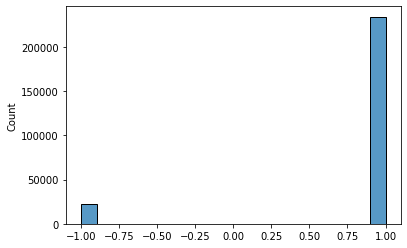

In [6]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=10000000).fit(df)
print = clf.predict(df)
sns.histplot(print)
df.to_csv(r"C:\Users\Avigael\Desktop\task1\IsolationForest.csv", columns=["record ID","duration_"])



<AxesSubplot:ylabel='Count'>

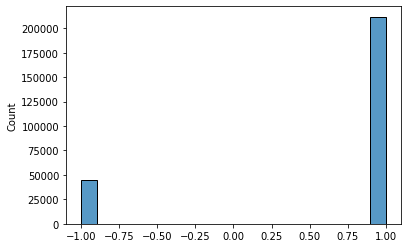

In [50]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2)
print = clf.fit_predict(df)
clf.negative_outlier_factor_
sns.histplot(print)

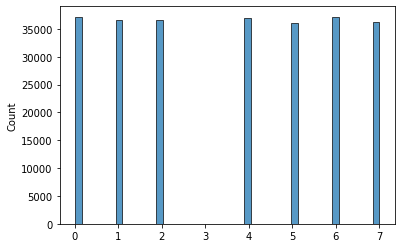

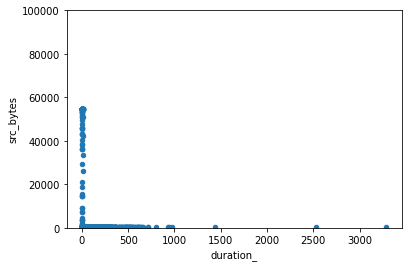

In [38]:
from sklearn.cluster import KMeans
import numpy as np
x = np.array(df)
kmeans = KMeans(n_clusters=8, random_state=7).fit(X)
print = kmeans.predict(x)
sns.histplot(print)
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));

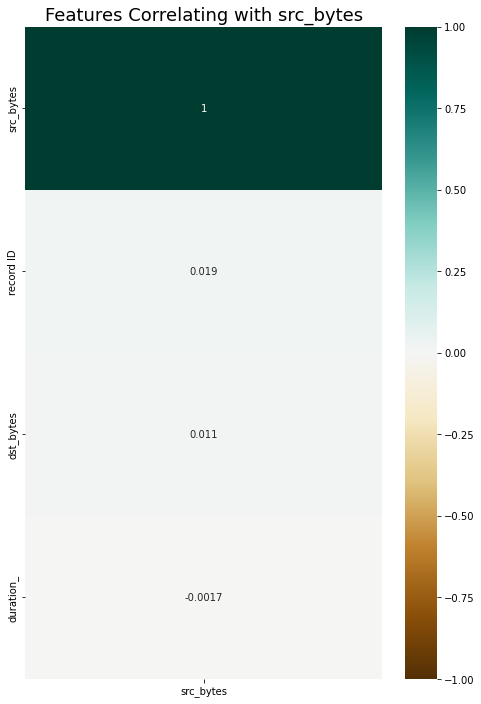

In [29]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

In [39]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
x = np.array([0, 0])
clf.predict_proba(X[:2, :])
array(df)
clf.score(X, y)


C:\Users\Avigael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'array' is not defined

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array(df)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
clustering
DBSCAN(eps=3, min_samples=2)


DBSCAN(eps=3, min_samples=2)

<AxesSubplot:ylabel='Count'>

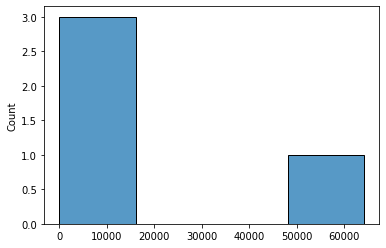

In [45]:
from scipy import stats
x = stats.norm.rvs(df)
x.std()

stats.median_abs_deviation(x)

x.std()

print = stats.median_abs_deviation(x)
sns.histplot(print)